<a href="https://colab.research.google.com/github/dudgus1286/pandas/blob/main/%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%A7%88%EC%9D%B4%EB%8B%9D/10_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%B6%84%EB%A5%98%E2%91%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 머신러닝 라이브러리 : 사이킷런

- https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## 머신러닝을 활용한 텍스트 분류
### 학습유형

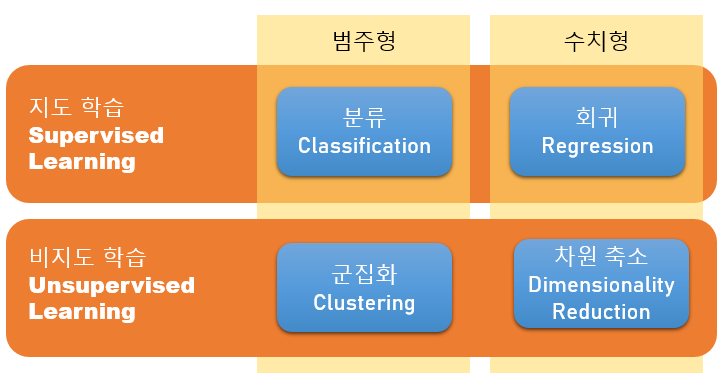

### 텍스트 머신러닝 단계

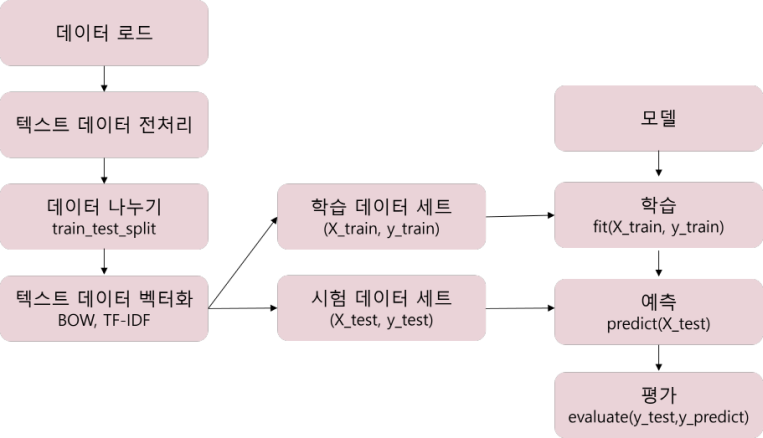




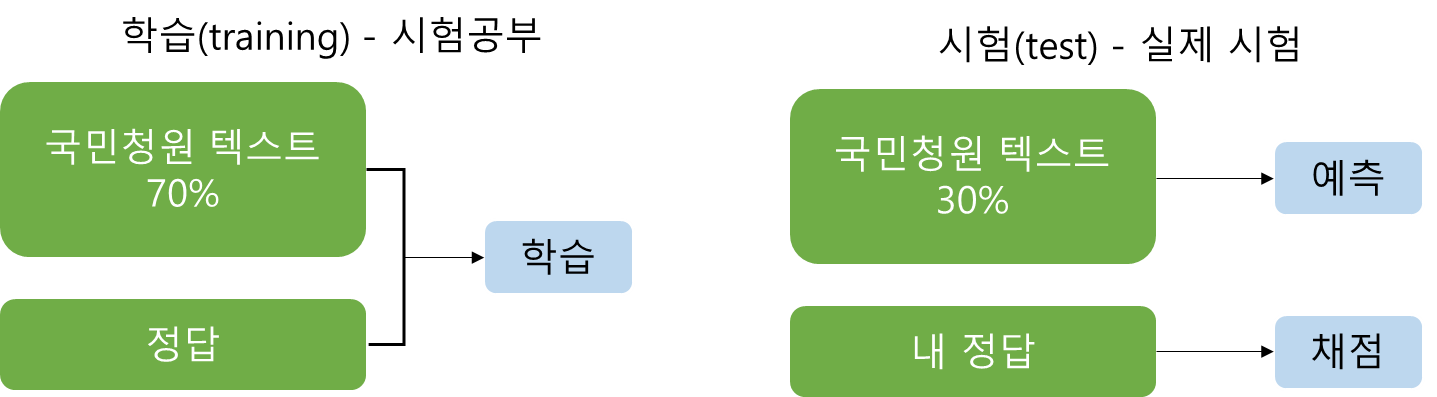

전체 과정
* feature_names : 학습(훈련), 예측에 사용할 단어 사전입니다.
* label_name : 정답값

* X_train : 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제

* X_test :  예측에 사용할 데이터셋 예) 실전 시험문제

* y_train : 학습(훈련)에 사용할 정답 값 예) 기출문제의 정답

* model : 학습, 예측에 사용할 머신러닝 알고리즘

* model.fit(X_train, y_train) : 학습(훈련), 기출문제와 정답을 가지고 학습(훈련)하는 과정과 유사합니다.

* model.predict(X_test) :  예측, 실제 시험을 보는 과정과 유사합니다. => 문제를 풀어서 정답을 구합니다.

* score
    * 시험을 봤다면 몇 문제를 맞고 틀렸는지 채점해 봅니다.
* metric
    * 점수를 채점하는 공식입니다. (예를 들어 학교에서 중간고사를 봤다면 전체 평균을 계산해 줍니다.)

In [1]:
!pip install koreanize_matplotlib
!pip install konlpy --upgrade
!pip install tqdm --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 46.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
import koreanize_matplotlib

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
corpus = ["코로나 거리두기와 코로나 상생지원금 문의입니다.",
          "지하철 운행시간과 지하철 요금 문의입니다.",
          "지하철 승강장 문의입니다.",
          "코로나 선별진료소 문의입니다.",
          "버스 운행시간 문의입니다.",
          "버스 터미널 위치 안내입니다.",
          "코로나 거리두기 안내입니다.",
          "택시 승강장 문의입니다."]

corpus

['코로나 거리두기와 코로나 상생지원금 문의입니다.',
 '지하철 운행시간과 지하철 요금 문의입니다.',
 '지하철 승강장 문의입니다.',
 '코로나 선별진료소 문의입니다.',
 '버스 운행시간 문의입니다.',
 '버스 터미널 위치 안내입니다.',
 '코로나 거리두기 안내입니다.',
 '택시 승강장 문의입니다.']

In [5]:
df = pd.DataFrame(corpus, columns=['문서'])
df

,문서
0,코로나 거리두기와 코로나 상생지원금 문의입니다.
1,지하철 운행시간과 지하철 요금 문의입니다.
2,지하철 승강장 문의입니다.
3,코로나 선별진료소 문의입니다.
4,버스 운행시간 문의입니다.
5,버스 터미널 위치 안내입니다.
6,코로나 거리두기 안내입니다.
7,택시 승강장 문의입니다.


## 정답 데이터 만들기
* 코로나가 들어가면 "보건"으로 그 외는 "교통"으로 레이블링

In [ ]:
df['문서'].str.contains('코로나')

0     True
1    False
2    False
3     True
4    False
5    False
6     True
7    False
Name: 문서, dtype: bool

In [12]:
# df['정답'] = '보건' if (df['문서'].str.contains('코로나')) else '교통'

df.loc[df['문서'].str.contains('코로나'), '정답'] = '보건'
df.loc[~df['문서'].str.contains('코로나'), '정답'] = '교통'

In [13]:
df

,문서,정답
0,코로나 거리두기와 코로나 상생지원금 문의입니다.,보건
1,지하철 운행시간과 지하철 요금 문의입니다.,교통
2,지하철 승강장 문의입니다.,교통
3,코로나 선별진료소 문의입니다.,보건
4,버스 운행시간 문의입니다.,교통
5,버스 터미널 위치 안내입니다.,교통
6,코로나 거리두기 안내입니다.,보건
7,택시 승강장 문의입니다.,교통


In [14]:
df['정답'].value_counts()

정답
교통    5
보건    3
Name: count, dtype: int64

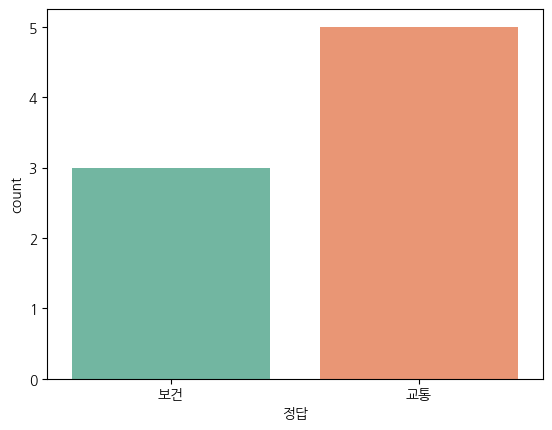

In [17]:
sns.countplot(data=df, x='정답', hue='정답', palette='Set2');

## 텍스트 데이터 수치 형태로 변경하기

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer()
dtm = cvect.fit_transform(df['문서'])
dtm

<8x16 sparse matrix of type '<class 'numpy.int64'>'
	with 27 stored elements in Compressed Sparse Row format>

## DTM(document-term matrix)

In [19]:
df_dtm = pd.DataFrame(dtm.toarray(), columns=cvect.get_feature_names_out())

In [20]:
df_dtm

,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0
1,0,0,1,0,0,0,0,0,1,0,1,0,2,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
6,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


## 문제와 정답 만들기

In [21]:
# 학습할 시험문제 생성
# 독립변수

X = df_dtm
X

,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0
1,0,0,1,0,0,0,0,0,1,0,1,0,2,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
6,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [22]:
# 종속변수

y = df['정답']
y

0    보건
1    교통
2    교통
3    보건
4    교통
5    교통
6    보건
7    교통
Name: 정답, dtype: object

## 데이터셋 나누기


In [27]:
# 데이터를 나눌 기준 설정

split_cnt = int(df.shape[0]*0.8)
split_cnt

6

In [28]:
# 전체 데이터 중 학습에 사용할 데이터
X_train = X[:split_cnt]

# 학습데이터의 정답
y_train = y[:split_cnt]

X_train.shape, y_train.shape

((6, 16), (6,))

In [30]:
# 시험(예측)용 데이터 - 학습이 끝난 후 시험 볼 데이터
X_test = X[split_cnt:]

# 시험데이터의 정답
y_test = y[split_cnt:]

X_test.shape, y_test.shape

((2, 16), (2,))

## 머신러닝 모델 로드하기

* [1.10. Decision Trees — scikit-learn documentation](https://scikit-learn.org/stable/modules/tree.html)
  - 분류와 회귀에 둘 다 사용 가능

In [31]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사.

In [32]:
# 훈련 = fit()

model.fit(X_train, y_train)

DecisionTreeClassifier()

## 예측
* 실전 시험문제(X_test) : 정답 직접 예측.

In [33]:
y_predict = model.predict(X_test)
y_predict

array(['보건', '교통'], dtype=object)

## 평가
### 정확도(Accuracy) 측정하기

In [34]:
(y_test == y_predict).mean()

1.0

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

1.0

In [36]:
pd.crosstab(y_test, y_predict)

col_0,교통,보건
정답,,
교통,1,0
보건,0,1


In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[1, 0],
       [0, 1]])

## 트리 알고리즘 분석하기
* 의사결정나무를 시각화

In [38]:
# export_text 로 트리 분석하기
from sklearn.tree import export_text


In [39]:
cvect.get_feature_names_out()

array(['거리두기', '거리두기와', '문의입니다', '버스', '상생지원금', '선별진료소', '승강장', '안내입니다',
       '요금', '운행시간', '운행시간과', '위치', '지하철', '코로나', '택시', '터미널'],
      dtype=object)

In [40]:
# help(export_text)

# cvect 에 담긴 피처 중 분류에 영향을 준 요소를 찾음
et = export_text(model, feature_names=cvect.get_feature_names_out().tolist())
print(et)

|--- 코로나 <= 0.50
|   |--- class: 교통
|--- 코로나 >  0.50
|   |--- class: 보건



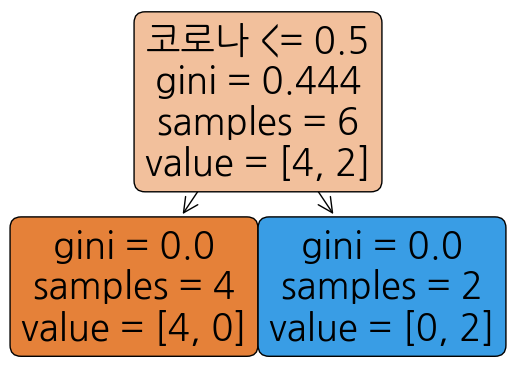

In [43]:
# plot_tree 로 시각화 하기
from sklearn.tree import plot_tree

plot_tree(model, feature_names=cvect.get_feature_names_out().tolist(), rounded=True, filled=True);

In [46]:
# feature_importances_로 피처 중요도 확인하기

model.feature_importances_

# cvect 에 담긴 피처의 중요도를 값으로 반환
fi = pd.Series(model.feature_importances_)
fi.index = cvect.get_feature_names_out()
fi

거리두기     0.0
거리두기와    0.0
문의입니다    0.0
버스       0.0
상생지원금    0.0
선별진료소    0.0
승강장      0.0
안내입니다    0.0
요금       0.0
운행시간     0.0
운행시간과    0.0
위치       0.0
지하철      0.0
코로나      1.0
택시       0.0
터미널      0.0
dtype: float64